### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. You should not need to create any new cells in the notebook, but feel free to do it if convenient for you.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may be corrupted if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Fill in your group number and the full names of the members in the cell below;
8. Make sure that you are not running an old version of IPython (we provide you with a cell that checks this, make sure you can run it without errors).

Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you the following steps before submission for ensuring that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

---

Group number and member names:

In [1]:
GROUP = "23"
NAME1 = "Michael Marne"
NAME2 = "Anup V Padaki"

Make sure you can run the following cell without errors.

In [2]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# Home Assignment 3
This home assignment will focus on reinforcement learning and deep reinforcement learning. The first part will cover value-table reinforcement learning techniques, and the second part will include neural networks as function approximators, i.e. deep reinforcement learning. 

When handing in this assignment, make sure that you're handing in the correct version, and more importantly, *that you do no clear any output from your cells*. We'll use these outputs to aid us when grading your assignment.

## Task 1: Gridworld

In this task, you will implement Value Iteration to solve for the optimal policy, $\pi^*$, and the corresponding state value function, $V^*$.

The MDP you will work with in this assignment is illustrated in the figure below

![title](./grid_world.png) 

The agent starts in one of the squares shown in the above figure, and then proceeds to take actions. The available actions at any time step are: **North, West, South,** and **East**. If an action would make the agent bump into a wall, or one of the black (unreachable) states, it instead does nothing, leaving the agent at the same place it was before.

The reward $R_s^a$ of being in state $s$ and performing actions $a$ is zero for all states, regardless of the action taken, with the exception of the green and the red squares. For the green square, the reward is always 1, and for the red square, always -1, regardless of the action.

When the agent is either in the green or the red square, it will be transported to the terminal state in the next time step, regardless of the action taken. The terminal state is shown as the white square with the "T" inside.

#### State representation
The notations used to define the states are illustrated in the table below

| $S_0$ | $S_1$ | $S_2$ | $S_3$ | $S_4$ |    |
|-------|-------|-------|-------|-------|----|
| $S_5$ | $S_6$ | $S_7$ | $S_8$ | $S_9$ |    |
| $S_{10}$ | $S_{11}$ | $S_{12}$ | $S_{13}$ | $S_{14}$ | $S_{15}$|

where $S_{10}$ corresponds to the initial state of the environment, $S_4$ and $S_9$ to the green and red states of the environment, and $S_{15}$ to the terminal state.


### Task 1.a: Solve for $V^*(s)$ and $Q^*(s,a)$
For this task all transition probabilities are assumed to be 1 (that is, trying to move in a certain direction will definitely move the agent in the chosen direction), and a discount factor of .9, i.e. $\gamma=.9$.

* Solve for $V^*(S_{10})$ 

**Your answer:** $\gamma^6 \approx 0.531441$

* Solve $Q^*(S_{10},a)$ for all actions

**Your answer:** $[\gamma^6, \gamma^7, \gamma^7, \gamma^6] \approx [0.53, 0.47, 0.47, 0.53]$



### Task 1.b Write a mathematical expression relating $V^\pi(s)$ to $Q^\pi(s,a)$ and $\pi(a|s)$


**Your answer:** 

$V^\pi(s) = \underset{a\in \mathcal{A}}{\operatorname{max}}Q^\pi(s,a)$

$\pi(a|s) = Q^\pi(s,a)$


###  Task 1.c: Value Iteration
For this task, the transitions are no longer deterministic. Instead, there is a 0.2 probability that the agent will try to travel in an orthogonal direction of the chosen action (0.1 probability for each of the two orthogonal directions). Note that the Markov decision process is still known and does not have to be learned from experience.

Your task is to implement value iteration and solve for the
* optimal greedy policy $\pi^*(s)$ 
* $V^*(s)$

#### The value iteration algorithm
Value iteration is an iterative algorithm used to compute the optimal value function $V^*(s)$. Each iteration starts with a guess of what the value function is and then uses the Bellman equations to improve this guess iteratively. We can describe one iteration of the algorithm as

$
\textbf{For} \quad s \in {\cal S}:\qquad  \\
\quad \textbf{For} \quad \, a \in {\cal A}: \\
\qquad Q(s,a) = \sum_{s'\in S} T(s,a,s')\left(R(s,a,s') + \gamma V(s') \right)\\ 
\quad V(s) = \underset{a}{\text{max}}~ Q(s,a)
$

where $T(s, a, s')={\mathrm Pr}[S'=s'\big|S=s,A=a]$ is the probability to transition state $s$ to $s'$ given action $a$.


#### The MDP Python class
The Markov Decision Process you will work with is defined in `gridworld_mdp.py`. In the implementation, the actions are represented by integers as, North = 0, West = 1, South = 2, and East = 3.
To interact with the MDP, you need to instantiate an object as: 


```python
mdp = GridWorldMDP()
```

At your disposal there are a number of instance-functions implemented for you, and presented below:

In [3]:
from gridworld_mdp import *
import numpy as np

help(GridWorldMDP.get_states)

Help on function get_states in module gridworld_mdp:

get_states(self)
    Returns complete set of states for the MDP
    :return: numpy array of shape [num states,]



In [4]:
# The constructor
help(GridWorldMDP.__init__)

Help on function __init__ in module gridworld_mdp:

__init__(self, trans_prob=0.8)
    Initializes an instance of the GridWorldMDP class
    :param trans_prob: transition probabilities (e.g. =1 for deterministic MDP)



In [5]:
help(GridWorldMDP.get_actions)

Help on function get_actions in module gridworld_mdp:

get_actions(self)
    Returns complete set of actions for the MDP
    :return: numpy array of shape [num actions,]



In [6]:
help(GridWorldMDP.state_transition_func)

Help on function state_transition_func in module gridworld_mdp:

state_transition_func(self, s, a)
    Returns the transition probabilities to all states given current state and action
    :param state: current state as integer
    :param action: selected action as integer
    :return: state-transition probabilities, i.e.
     [P[S_0| S=s, A_t=a], P[S_1| S=s, A=a], ..., P[S_14| S=s, A=a]]



In [7]:
help(GridWorldMDP.reward_function)

Help on function reward_function in module gridworld_mdp:

reward_function(self, s, a)
    Returns the reward r(s,a)
    :param state: current state as integer
    :param action: selected action as integer
    :return: r(s,a)



We also provide two helper functions for visualizing the value function and the policies you obtain:

In [8]:
# Function for printing a policy pi
def print_policy(pi):
    print('Policy for non-terminal states: ')
    indencies = np.arange(1, 16)
    txt = '| '
    hor_delimiter = '---------------------'
    print(hor_delimiter)
    for a, i in zip(pi, indencies):
        txt += mdp.act_to_char_dict[a] + ' | '
        if i % 5 == 0:
            print(txt + '\n' + hor_delimiter)
            txt = '| '
    print('                            ---')
    print('Policy for terminal state: |', mdp.act_to_char_dict[pi[15]],'|')
    print('                            ---')            

# Function for printing a table with of the value function
def print_value_table(values, num_iterations=None):            
    if num_iterations:
        print('Values for non-terminal states after: ', num_iterations, 'iterations \n', np.reshape(values, [3, 5]), '\n')
        print('Value for terminal state:', terminal_value, '\n')
    else: 
        terminal_value = values[-1]
        print('Values for non-terminal states: \n', np.reshape(values[:-1], [3, 5]))
        print('Value for terminal state:', terminal_value, '\n')

Now it's time for you to implement your own version of value iteration to solve for the greedy policy and $V^*(s)$.

In [9]:
def value_iteration(gamma, mdp):
    V = np.zeros([16]) # state value table
    Q = np.zeros([16, 4]) # state action value table
    pi = np.zeros([16]) # greedy policy table

    # YOUR CODE HERE
    V[4] = 1;
    V[9] = -1;
    
    # North = 0, West = 1, South = 2, and East = 3.
    oldQ = Q + 1;
    while not (oldQ == Q).all():
        oldQ = Q.copy();
        for state in mdp.get_states():
            
            for action in mdp.get_actions():
                T = mdp.state_transition_func(state,action);
                qsa = 0;
                for next_state in range(len(T)):
                    qsa += T[next_state]*(mdp.reward_function(state,action) + gamma * V[next_state]);
                
                Q[state,action] = qsa;
            V[state] = Q[state].max();
            pi[state] = Q[state].argmax();
            
    return V, pi


Run your implementation for the deterministic version of our MDP. As a sanity check, compare your analytical solutions with the output from your implementation.

In [10]:
mdp = GridWorldMDP(trans_prob=1.)
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.6561    0.729     0.81      0.9       1.      ]
 [ 0.59049   0.        0.        0.81     -1.      ]
 [ 0.531441  0.59049   0.6561    0.729     0.6561  ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | E | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Once your implementation passed the sanity check, run it for the stochastic case, where the probability of an action succeding is 0.8, and 0.2 of moving the agent in an orthogonal direction to the intended. Use $\gamma = .99$.

In [11]:
# Run for stochastic MDP, gamma = .99
mdp = GridWorldMDP()
v, pi = value_iteration(.99, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.93861973  0.95193393  0.9639533   0.97612443  1.        ]
 [ 0.92691625  0.          0.          0.88371826 -1.        ]
 [ 0.91395196  0.90255605  0.89130223  0.88057656  0.79978972]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | N | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Does the policy that the algorithm found looks reasonable? For instance, what's the policy for state $S_8$? Is that a good idea? Why?

**Your answer:** Yes it seems reasonable. If you are in state $S_8$ and try to move north there's a small chance of going to the negative reward ($S_9$), while going west eliminates that possibility, ensuring that you reach state $S_4$ instead, as there is an equally small possibility of going north instead of west. This might take a few tries, but this doesn't matter that much, as $\gamma=0.99$, i.e. we have a long horizon and are able to see the reward in the future.

Test your implementation using this function.

In [12]:
test_value_iteration(v, pi)

Passed: state-value test, for gamma=.99
Passed: policy test, for gamma=.99


Run value iteration for the same scenario as above, but now with $\gamma=.9$

In [13]:
# Run for stochastic MDP, gamma = .9
mdp = GridWorldMDP()
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.56631445  0.65360208  0.74438015  0.84776628  1.        ]
 [ 0.49725171  0.          0.          0.57185903 -1.        ]
 [ 0.43084446  0.37830245  0.41624465  0.47405641  0.2761765 ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | W | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Do you notice any difference between the greedy policy for the two different discount factors. If so, what's the difference, and why do you think this happened?

**Your answer:** Here we have $\gamma=0.9$ instead, meaning we are not as patient as before, we don't value the future reward as much and therefore we are willing to take more risks.

## Task 2: Q-learning

In the previous task, you solved for $V^*(s)$ and the greedy policy $\pi^*(s)$, with the entire model of the MDP being available to you. This is however not very practical since for most problems we are trying to solve, the model is not known, and estimating the model is quite often a very tedious process which often also requires a lot of simplifications. 

#### Q-learning algorithm
$
\text{Initialize}~Q(s,a), ~ \forall~ s \in {\cal S},~ a~\in {\cal A} \\
\textbf{Repeat}~\text{(for each episode):}\\
\quad \text{Initialize}~s\\
\qquad \textbf{Repeat}~\text{(for each step in episode):}\\
\qquad\quad \text{Chose $a$ from $s$ using poliy derived from $Q$ (e.g., $\epsilon$-greedy)}\\
\qquad\quad \text{Take action a, observe r, s'}\\
\qquad\quad Q(s,a) \leftarrow Q(s,a) + \alpha \left(r + \gamma~\underset{a}{\text{max}}~Q(s',a) - Q(s,a) \right) \\
\qquad\quad s \leftarrow s' \\
\qquad \text{Until s is terminal}
$

### Task 2.1 Model-free control
Why is it that Q-learning does not require a model of the MDP to solve for it?  

**Your answer:** Because we discover the model by exploration instead, using experience. We learn the value of Q for the states we discover.

### Task 2.2  Implement an $\epsilon$-greedy policy
The goal of the Q-learning algorithm is to find the optimal policy $\pi^*$, by estimating the state action value function under the optimal policy, i.e. $Q^*(s, a)$. From $Q^*(s,a)$, the agent can follow $\pi^*$, by choosing the action with that yields the largest expected value for each state, i.e. $\underset{a}{\text{argmax}}~Q^*(s, a)$.

However, when training a Q-learning model, the agent typically follows another policy to explore the environment. In reinforcement learning this is known as off-policy learning. 

Your task is to implement a widely popular exploration policy, known as  the $\epsilon$-greedy policy, in the cell below.

An $\epsilon$-Greedy policy should:
* with probability $\epsilon$ take an uniformly-random action.
* otherwise choose the best action according to the estimated state action values.

In [15]:
def eps_greedy_policy(q_values, eps):
    '''
    Creates an epsilon-greedy policy
    :param q_values: set of Q-values of shape (num actions,)
    :param eps: probability of taking a uniform random action 
    :return: policy of shape (num actions,)
    '''
    # YOUR CODE HERE
    policy = np.zeros(len(q_values));
    if eps >= np.random.rand():
        policy[:] = 1.0 / len(q_values);
    else:
        action = (np.random.random(q_values.shape) * (q_values == q_values.max())).argmax();
        policy[action] = 1.0;
        
    return policy
    

Run the cell below to test your implementation

In [16]:
mdp = GridWorldMDP()

# Test shape of output
actions = mdp.get_actions()
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"
actions = [i for i in range(10)]
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"

# Test for greedy actions
for a in actions:
    foo = np.zeros([len(actions)])
    foo[a] = 1.
    eps_greedy = eps_greedy_policy(foo, 0)
    assert np.array_equal(foo, eps_greedy), "policy is not greedy"

# Test for uniform distribution, when eps=1
eps_greedy = eps_greedy_policy(foo, 1)
assert all(p==eps_greedy[0] for p in eps_greedy) and np.sum(eps_greedy)==1, \
"policy does not return a uniform distribution for eps=1"

print('Test passed, good job!')

Test passed, good job!


### Task 2.2: Implement the Q-learning algorithm

Now it's time to actually implement the Q-learning algorithm. Unlike the Value iteration where there is no direct interactions with the environment, the Q-learning algorithm builds up its estimations by interacting and exploring the environment. 

To enable the agent to explore the environment a set of helper functions are provided:

In [17]:
help(GridWorldMDP.reset)

Help on function reset in module gridworld_mdp:

reset(self)
    Resets the environment and the agent is positioned in the initial state in the bottom left corner.
    :return: state, reward, terminal



In [18]:
help(GridWorldMDP.step)

Help on function step in module gridworld_mdp:

step(self, action)
    Takes one step in the environment using the selected action
    :param action: action to execute, integer
    :return: state, reward, terminal



Implement your version of Q-learning in the cell below. 

**Hint:** It might be useful to study the pseudocode provided above. 

In [33]:
def q_learning(eps, gamma):
    Q = np.zeros([16, 4]) # state action value table
    pi = np.zeros([16]) # greedy policy table
    alpha = .01

    # YOUR CODE HERE
    env = GridWorldMDP();
    
    same_pi = 0;
    old_pi = pi+1;
    
    #for i in range(5000):
    while same_pi < 800:   
        
        if (old_pi==pi).all():
            same_pi += 1;
        else:
            same_pi = 0;
            
        old_pi = pi.copy();
        
        state, reward, terminal = env.reset();
        
        while not terminal:
            
            policy = eps_greedy_policy(Q[state], eps);
            action = (np.random.random(policy.shape) * (policy == policy.max())).argmax();
            
            state_prime, reward, terminal = env.step(action);
        
            
            Q[state,action] = Q[state, action] + alpha * (reward + gamma * Q[state_prime].max() - Q[state,action]);
            pi = Q.argmax(axis=1);
            state = state_prime;
            
            
        
        
    return pi, Q

Run Q-learning with  $\epsilon = 1$ for the MDP with $\gamma=0.99$

In [34]:
pi, Q = q_learning(1, .99)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | S | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Test your implementation by running the cell below

In [35]:
test_q_learning(Q)

Passed: policy test, for gamma=.99


Run Q-learning with $\epsilon=0$

In [36]:
pi, Q = q_learning(0, .99)
print_policy(pi)

Policy for non-terminal states: 
---------------------
| E | E | E | S | S | 
---------------------
| N | N | N | W | S | 
---------------------
| N | W | E | N | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


You ran your implementation with $\epsilon$ set to both 0 and 1. What are the results, and your conclusions?

**Your answer:** for  ϵ=1.0  we are randomly exploring the state space, so we see all states and take all actions eventually, and therefore we get the optimal policy. for  ϵ=0.0  we follow our own policy all the time, which causes us not to explore the full state space and are therefore very unlikley to find the optimal policy.
It is also possible for the learning to get stuck depending on the first few steps

# Task 3: Deep Double Q-learning (DDQN)
For this task, you will implement a DDQN (double deep Q-learning network) to solve one of the problems of the OpenAI gym. Before we get into details about these type of networks, let's first review the simpler, DQN (deep Q-learning network) version. 

#### Deep Q Networks
As we saw in the video lectures, using a neural network as a state action value approximator is a great idea. However, if one tries to use this approach with Q-learning, it's very likely that the optimization will be very unstable. To remediate this, two main ideas are used. First, we use experience replay, in order to decorrelate the experience samples we obtain when exploring the environment. Second, we use two networks instead of one, in order to fix the optimization targets. That is, for a given minibatch sampled from the replay buffer, we'll optimize the weights of only one of the networks (commonly denoted as the "online" network), using the gradients w.r.t a loss function. This loss function is computed as the mean squared error between the current action values, computed according to the **online** network, and the temporal difference (TD) targets, computed using the other, **fixed network** (which we'll refer to as the "target" network).

That is, the loss function is 

$$ L(\theta) = \frac{1}{N}\sum_{i=1}^N \left(Q(s_i,a_i; \theta\right) - Y_i)^2~,$$

where $N$ is the number of samples in your minibatch, $Q(s,a;\theta)$ is the state action value estimate, according to the online network (with parameters $\theta$), and $Y_t$ is the TD target, computed as

$$ Y_i = r_i +  \gamma ~\underset{a}{\text{max}}~Q(s_i', a; \theta^-)~, $$

where $Q(s', a;\theta')$ is the action value estimate, according to the fixed network (with parameters $\theta^-$).

Finally, so that the offline parameters are also updated, we periodically change the roles of the networks, fixing the online one, and training the other.

#### Double Deep Q Networks

The idea explained above works well in practice, but later it was discovered that this approach is very prone to overestimating the state action values. The main reason for this is that the max operator, used to select the greedy action when computing the TD target, uses the same values both to select and to evaluate an action (this tends to prefer overestimated actions). In order to prevent this, we can decouple the selection from the evaluation, which is the idea that created DDQN. More concretely, the TD target for a DDQN is now 

$$ Y_i = r_i + \gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~. $$

Hence, we're using the **online** network to select which action is best, but we use the **fixed** network to evaluate the state action value for that chosen action in the next state. This is what makes DDQN not overestimate (as much) the state action values, which in turn helps us to train faster and obtain better policies.




#### Environment

The problem you will solve for this task is the inverted pendulum problem. 
On [Open AIs environment documentation](https://gym.openai.com/envs/CartPole-v0) , the following description is provided:

*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.*

![title](./cartpole.jpg) 

#### Implementation
We'll solve this task using a DDQN. Most of the code is provided for you, in the file **ddqn_model.py**. This file contains the implementation of a neural network, which is described in the table below (feel free to experiment with different architectures).

|Layer 1: units, activation | Layer 2: units, activation | Layer 3: units, activation | Cost function |
|---------------------------|----------------------------|----------------------------|---------------|
| 100, ReLu                 | 60, ReLu                   | number of actions, linear | MSE           |

The only missing part of the code is the function that computes the TD targets for each minibatch of samples.

## Task 3.1:  Calculate TD-target

For this task, you will calculate the temporal difference target used for the loss in the double Q-learning algorithm. Your implementation should follow precisely the equation defined above for the TD target of DDQNs, with one exception: when s' is terminal, the TD target for it should simply be $ Y_i = r_i$. Why is this necessary?

**Your answer:** When we are in the terminal state the "next state" ($s'$) doesn't exist

Implement your function in the following cell.

In [38]:
def calculate_td_targets(q1_batch, q2_batch, r_batch, t_batch, gamma=.99):
    '''
    Calculates the TD-target used for the loss
    : param q1_batch: Batch of Q(s', a) from online network, shape (N, num actions)
    : param q2_batch: Batch of Q(s', a) from target network, shape (N, num actions)
    : param r_batch: Batch of rewards, shape (N, 1)
    : param t_batch: Batch of booleans indicating if state, s' is terminal, shape (N, 1)
    : return: TD-target, shape (N, 1)
    '''

    # YOUR CODE HERE
    Y = np.zeros(t_batch.shape);
    for i in range(t_batch.size):
        Y[i] = r_batch[i];
        if not t_batch[i]:
            Y[i] += (gamma * (q2_batch[i, q1_batch[i].argmax()]))
    return Y

Test your implementation by trying to solve the reinforcement learning problem for the Cartpole environment. The following cell defines the `train_loop_ddqn` function, which will be called ahead.

**Note:** If you have issues with the env.render() command below on your system, you may simply comment it out. However, you would be missing out on a visualization of the training episodes.

In [39]:
# Import dependencies
import numpy as np
import gym
from keras.utils.np_utils import to_categorical as one_hot
from collections import namedtuple
from dqn_model import DoubleQLearningModel, ExperienceReplay

def train_loop_ddqn(model, env, num_episodes, batch_size=64, gamma=.94):        
    Transition = namedtuple("Transition", ["s", "a", "r", "next_s", "t"])
    eps = 1.
    eps_end = .1 
    eps_decay = .001
    R_buffer = []
    R_avg = []
    for i in range(num_episodes):
        state = env.reset() #reset to initial state
        state = np.expand_dims(state, axis=0)/2
        terminal = False # reset terminal flag
        ep_reward = 0
        q_buffer = []
        steps = 0
        while not terminal:
            env.render() # comment this line out if you don't want to / cannot render the environment on your system
            steps += 1
            q_values = model.get_q_values(state)
            q_buffer.append(q_values)
            policy = eps_greedy_policy(q_values.squeeze(), eps) 
            action = np.random.choice(num_actions, p=policy) # sample action from epsilon-greedy policy
            new_state, reward, terminal, _ = env.step(action) # take one step in the evironment
            new_state = np.expand_dims(new_state, axis=0)/2
            
            # only use the terminal flag for ending the episode and not for training
            # if the flag is set due to that the maximum amount of steps is reached 
            t_to_buffer = terminal if not steps == 200 else False
            
            # store data to replay buffer
            replay_buffer.add(Transition(s=state, a=action, r=reward, next_s=new_state, t=t_to_buffer))
            state = new_state
            ep_reward += reward
            
            # if buffer contains more than 1000 samples, perform one training step
            if replay_buffer.buffer_length > 1000:
                s, a, r, s_, t = replay_buffer.sample_minibatch(batch_size) # sample a minibatch of transitions
                q_1, q_2 = model.get_q_values_for_both_models(np.squeeze(s_))
                td_target = calculate_td_targets(q_1, q_2, r, t, gamma)
                model.update(s, td_target, a)    
                
        eps = max(eps - eps_decay, eps_end) # decrease epsilon        
        R_buffer.append(ep_reward)
        
        # running average of episodic rewards
        R_avg.append(.05 * R_buffer[i] + .95 * R_avg[i-1]) if i > 0 else R_avg.append(R_buffer[i])
        print('Episode: ', i, 'Reward:', ep_reward, 'Epsilon', eps, 'mean q', np.mean(np.array(q_buffer)))
        
        # if running average > 195, the task is considerd solved
        if R_avg[-1] > 195:
            return R_buffer, R_avg
    return R_buffer, R_avg

Using TensorFlow backend.


and the next cell performs the actual training. 

A Working implementation should start to improve after 500 episodes. An episodic reward of around 200 is likely to be achieved after 800 episodes for a batchsize of 128, and 1000 episodes for a batchsize of 64. 

In [40]:
# Create the environment
env = gym.make("CartPole-v0")

# Initializations
num_actions = env.action_space.n
obs_dim = env.observation_space.shape[0]

# Our Neural Netork model used to estimate the Q-values
model = DoubleQLearningModel(state_dim=obs_dim, action_dim=num_actions, learning_rate=1e-4)

# Create replay buffer, where experience in form of tuples <s,a,r,s',t>, gathered from the environment is stored 
# for training
replay_buffer = ExperienceReplay(state_size=obs_dim)

# Train
num_episodes = 800 
batch_size = 128 
R, R_avg = train_loop_ddqn(model, env, num_episodes, batch_size) 

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode:  0 Reward: 26.0 Epsilon 0.999 mean q -2.6007223e-07
Episode:  1 Reward: 30.0 Epsilon 0.998 mean q -2.2224414e-07
Episode:  2 Reward: 32.0 Epsilon 0.997 mean q 2.2374248e-08
Episode:  3 Reward: 42.0 Epsilon 0.996 mean q -1.5501215e-07
Episode:  4 Reward: 13.0 Epsilon 0.995 mean q -4.1408674e-07
Episode:  5 Reward: 22.0 Epsilon 0.994 mean q -2.2792901e-07
Episode:  6 Reward: 18.0 Epsilon 0.993 mean q 3.172668e-08
Episode:  7 Reward: 9.0 Epsilon 0.992 mean q -4.846511e-07
Episode:  8 Reward: 26.0 Epsilon 0.991 mean q -2.0321376e-07
Episode:  9 Reward: 20.0 Epsilon 0.99 mean q -2.5923268e-07
Episode:  10 Reward: 17.0 Epsilon 0.989 mean q 2.0528365e-08
Episode:  11 Reward: 17.0 Epsilon 0.988 mean q -3.759898e-07
Episode:  12 Reward: 17.0 Epsilon 0.987 mean q 6.155705e-08
Episode:  13 Reward: 47.0 Epsilon 0.986 mean q -1.359589e-07
Episode:  14 Reward: 56.0 Epsilon 0.985 mean q -7.4358

Episode:  125 Reward: 17.0 Epsilon 0.8739999999999999 mean q 5.596627
Episode:  126 Reward: 10.0 Epsilon 0.8729999999999999 mean q 6.6496096
Episode:  127 Reward: 10.0 Epsilon 0.8719999999999999 mean q 7.991562
Episode:  128 Reward: 12.0 Epsilon 0.8709999999999999 mean q 7.950768
Episode:  129 Reward: 17.0 Epsilon 0.8699999999999999 mean q 5.8266883
Episode:  130 Reward: 13.0 Epsilon 0.8689999999999999 mean q 6.2220187
Episode:  131 Reward: 12.0 Epsilon 0.8679999999999999 mean q 6.640593
Episode:  132 Reward: 45.0 Epsilon 0.8669999999999999 mean q 7.087985
Episode:  133 Reward: 12.0 Epsilon 0.8659999999999999 mean q 8.104625
Episode:  134 Reward: 26.0 Epsilon 0.8649999999999999 mean q 5.1363306
Episode:  135 Reward: 10.0 Epsilon 0.8639999999999999 mean q 10.008939
Episode:  136 Reward: 28.0 Epsilon 0.8629999999999999 mean q 5.624965
Episode:  137 Reward: 23.0 Epsilon 0.8619999999999999 mean q 5.670519
Episode:  138 Reward: 30.0 Epsilon 0.8609999999999999 mean q 6.031213
Episode:  139 R

Episode:  242 Reward: 23.0 Epsilon 0.7569999999999998 mean q 14.172959
Episode:  243 Reward: 24.0 Epsilon 0.7559999999999998 mean q 15.842809
Episode:  244 Reward: 12.0 Epsilon 0.7549999999999998 mean q 19.5561
Episode:  245 Reward: 24.0 Epsilon 0.7539999999999998 mean q 17.311615
Episode:  246 Reward: 43.0 Epsilon 0.7529999999999998 mean q 17.106695
Episode:  247 Reward: 11.0 Epsilon 0.7519999999999998 mean q 18.228018
Episode:  248 Reward: 25.0 Epsilon 0.7509999999999998 mean q 15.720433
Episode:  249 Reward: 29.0 Epsilon 0.7499999999999998 mean q 14.164359
Episode:  250 Reward: 14.0 Epsilon 0.7489999999999998 mean q 14.643656
Episode:  251 Reward: 12.0 Epsilon 0.7479999999999998 mean q 17.692518
Episode:  252 Reward: 25.0 Epsilon 0.7469999999999998 mean q 15.343769
Episode:  253 Reward: 18.0 Epsilon 0.7459999999999998 mean q 15.134823
Episode:  254 Reward: 25.0 Epsilon 0.7449999999999998 mean q 15.170985
Episode:  255 Reward: 11.0 Epsilon 0.7439999999999998 mean q 16.44556
Episode: 

Episode:  358 Reward: 17.0 Epsilon 0.6409999999999997 mean q 13.6780205
Episode:  359 Reward: 10.0 Epsilon 0.6399999999999997 mean q 14.140593
Episode:  360 Reward: 18.0 Epsilon 0.6389999999999997 mean q 13.552632
Episode:  361 Reward: 17.0 Epsilon 0.6379999999999997 mean q 14.0241785
Episode:  362 Reward: 16.0 Epsilon 0.6369999999999997 mean q 13.57929
Episode:  363 Reward: 13.0 Epsilon 0.6359999999999997 mean q 13.712702
Episode:  364 Reward: 12.0 Epsilon 0.6349999999999997 mean q 13.871524
Episode:  365 Reward: 12.0 Epsilon 0.6339999999999997 mean q 14.224129
Episode:  366 Reward: 13.0 Epsilon 0.6329999999999997 mean q 13.961079
Episode:  367 Reward: 19.0 Epsilon 0.6319999999999997 mean q 11.216164
Episode:  368 Reward: 13.0 Epsilon 0.6309999999999997 mean q 14.975117
Episode:  369 Reward: 12.0 Epsilon 0.6299999999999997 mean q 13.842667
Episode:  370 Reward: 23.0 Epsilon 0.6289999999999997 mean q 12.915849
Episode:  371 Reward: 40.0 Epsilon 0.6279999999999997 mean q 13.086325
Episo

Episode:  474 Reward: 16.0 Epsilon 0.5249999999999996 mean q 10.9561825
Episode:  475 Reward: 19.0 Epsilon 0.5239999999999996 mean q 11.067889
Episode:  476 Reward: 14.0 Epsilon 0.5229999999999996 mean q 10.765662
Episode:  477 Reward: 29.0 Epsilon 0.5219999999999996 mean q 11.1242
Episode:  478 Reward: 11.0 Epsilon 0.5209999999999996 mean q 10.698141
Episode:  479 Reward: 12.0 Epsilon 0.5199999999999996 mean q 10.756589
Episode:  480 Reward: 11.0 Epsilon 0.5189999999999996 mean q 10.412851
Episode:  481 Reward: 11.0 Epsilon 0.5179999999999996 mean q 10.016658
Episode:  482 Reward: 17.0 Epsilon 0.5169999999999996 mean q 10.436416
Episode:  483 Reward: 8.0 Epsilon 0.5159999999999996 mean q 10.188955
Episode:  484 Reward: 17.0 Epsilon 0.5149999999999996 mean q 10.502033
Episode:  485 Reward: 16.0 Epsilon 0.5139999999999996 mean q 10.483061
Episode:  486 Reward: 13.0 Epsilon 0.5129999999999996 mean q 10.397782
Episode:  487 Reward: 27.0 Epsilon 0.5119999999999996 mean q 10.03861
Episode: 

Episode:  589 Reward: 50.0 Epsilon 0.4099999999999995 mean q 15.559775
Episode:  590 Reward: 77.0 Epsilon 0.4089999999999995 mean q 15.985983
Episode:  591 Reward: 35.0 Epsilon 0.4079999999999995 mean q 15.503441
Episode:  592 Reward: 48.0 Epsilon 0.4069999999999995 mean q 15.462918
Episode:  593 Reward: 68.0 Epsilon 0.4059999999999995 mean q 15.732921
Episode:  594 Reward: 63.0 Epsilon 0.40499999999999947 mean q 15.954651
Episode:  595 Reward: 36.0 Epsilon 0.40399999999999947 mean q 15.685558
Episode:  596 Reward: 30.0 Epsilon 0.40299999999999947 mean q 15.276139
Episode:  597 Reward: 84.0 Epsilon 0.40199999999999947 mean q 15.627966
Episode:  598 Reward: 42.0 Epsilon 0.40099999999999947 mean q 15.748937
Episode:  599 Reward: 24.0 Epsilon 0.39999999999999947 mean q 15.204837
Episode:  600 Reward: 79.0 Epsilon 0.39899999999999947 mean q 15.492083
Episode:  601 Reward: 71.0 Epsilon 0.39799999999999947 mean q 15.500893
Episode:  602 Reward: 57.0 Epsilon 0.39699999999999946 mean q 15.7295

Episode:  704 Reward: 52.0 Epsilon 0.2949999999999994 mean q 14.82186
Episode:  705 Reward: 185.0 Epsilon 0.2939999999999994 mean q 15.811581
Episode:  706 Reward: 119.0 Epsilon 0.29299999999999937 mean q 15.940875
Episode:  707 Reward: 51.0 Epsilon 0.29199999999999937 mean q 14.710758
Episode:  708 Reward: 69.0 Epsilon 0.29099999999999937 mean q 14.687224
Episode:  709 Reward: 182.0 Epsilon 0.28999999999999937 mean q 15.496459
Episode:  710 Reward: 68.0 Epsilon 0.28899999999999937 mean q 15.127879
Episode:  711 Reward: 73.0 Epsilon 0.28799999999999937 mean q 14.93255
Episode:  712 Reward: 69.0 Epsilon 0.28699999999999937 mean q 15.959305
Episode:  713 Reward: 83.0 Epsilon 0.28599999999999937 mean q 15.884582
Episode:  714 Reward: 104.0 Epsilon 0.28499999999999936 mean q 15.428955
Episode:  715 Reward: 190.0 Epsilon 0.28399999999999936 mean q 15.593672
Episode:  716 Reward: 53.0 Epsilon 0.28299999999999936 mean q 16.072065
Episode:  717 Reward: 61.0 Epsilon 0.28199999999999936 mean q 1

In [41]:
# close window (if you used env.render())
env.close()

According to the code above, and the code in the provided .py file, answer the following questions:
    
What is the state for this problem?

**Your answer:** The state is the observation of the environment (the game)m which is cart position, cart velocity, pole angle and pole tip velocity.

When do we switch the networks (i.e. when does the online network become the fixed one, and vice-versa)?

**Your answer:** After every training step there is a 50% chance that we switch the networks.

Run the cell below to visualize your final policy in an episode from this environment.

**Note:** In order to visualize, the env.render() command needs to work out on your system (see comment a few cells above).

In [42]:
import time
num_episodes = 1
env = gym.make("CartPole-v0")

for i in range(num_episodes):
        state = env.reset() #reset to initial state
        state = np.expand_dims(state, axis=0)/2
        terminal = False # reset terminal flag
        while not terminal:
            env.render()
            time.sleep(.05)
            q_values = model.get_q_values(state)
            policy = eps_greedy_policy(q_values.squeeze(), .1) # greedy policy
            action = np.random.choice(num_actions, p=policy)
            state, reward, terminal, _ = env.step(action) # take one step in the evironment
            state = np.expand_dims(state, axis=0)/2
# close window
env.close();

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Plot the episodic rewards obtained throughout the optimization, together with a moving average of it (since the episodic reward is usually very noisy).

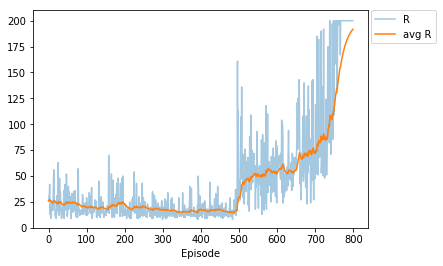

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

rewards = plt.plot(R, alpha=.4, label='R')
avg_rewards = plt.plot(R_avg,label='avg R')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Episode')
plt.ylim(0, 210)
plt.show()

Congratulations, you have now successfully implemented the DDQN algorithm. You are encouraged to explore different problems. There are a lot of different environments ready for you to implement your algorithms in. A few of these resources are:
* [OpenAI gym](https://github.com/openai/gym)
* [OpenAI Universe](https://github.com/openai/universe)
* [DeepMind Lab](https://deepmind.com/blog/open-sourcing-deepmind-lab/)

The model you implemented in this lab can be extended to solve harder problems. A good starting-point is to try to solve the Acrobot-problem, by loading the environment as 

**gym.make("Acrobot-v1")**.

The problem might require some modifications to how you decay $\epsilon$, but otherwise, the code you have written within this lab should be sufficient. 

### Task 3.2 Atari games

A common benchmark for reinforcement learning algorithms is the old Atari games. For the Atari games, each observation consists of one screenshot of the current state of the game. Other than adding convolutional layers to your neural network, there is one more issue regarding the new input that needs to be solved. Name at least two solutions to the problem, and why it won't work without these changes. 

Hint:
- Imagine the game of pong. What is important for the algorithm to predict? What is the input to the algorithm? Is it possible to predict what we want from the input given?

**Your answer:** We need to be able to "see" movement in the image, and therefore we need to have multiple frames as input in order to track how everything is moving. For instance we could have the last 4 frames of the game as input.
We could also solve this with LSTMs or GRUs, as they provide memory for the network. With memory we can predict movement without having access to the previous frames.